In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Amazon Sale Report.csv', encoding='ISO-8859-1')
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [3]:
# Drop columns with all missing values
df.dropna(axis=1, how='all', inplace=True)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                128976 non-null  datetime64[ns]
 3   Status              128976 non-null  object        
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  object        
 6   ship-service-level  128976 non-null  object        
 7   Category            128976 non-null  object        
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  object        
 10  Qty                 128976 non-null  int64         
 11  currency            121176 non-null  object        
 12  Amount              121176 non-null  float64       
 13  ship-city           128941 no

C:\Users\DELL\AppData\Local\Temp\ipykernel_2168\3864919840.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


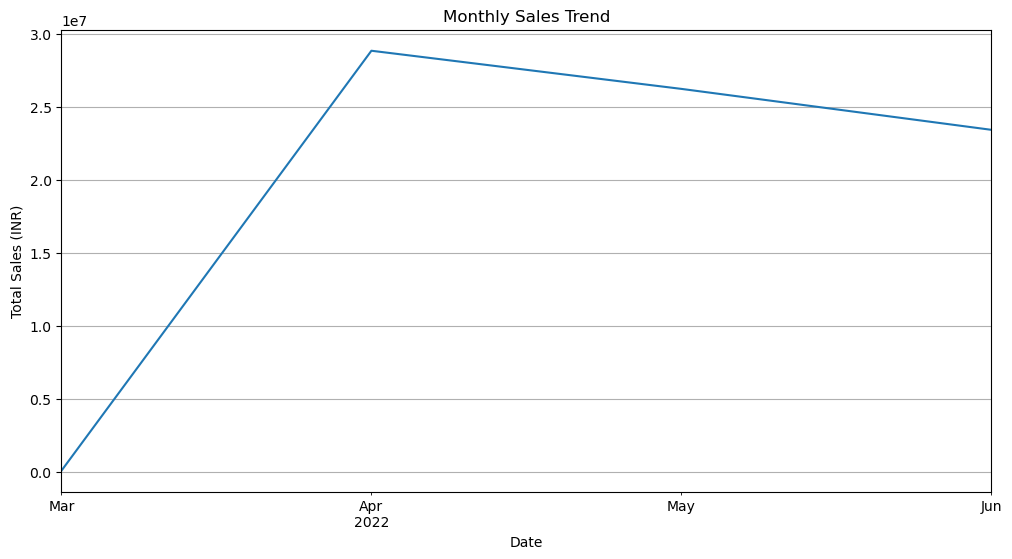

In [4]:
# Sales over time
sales_trend = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()
sales_trend.plot(kind='line', title='Monthly Sales Trend', figsize=(12, 6))
plt.ylabel('Total Sales (INR)')
plt.grid(True)
plt.show()


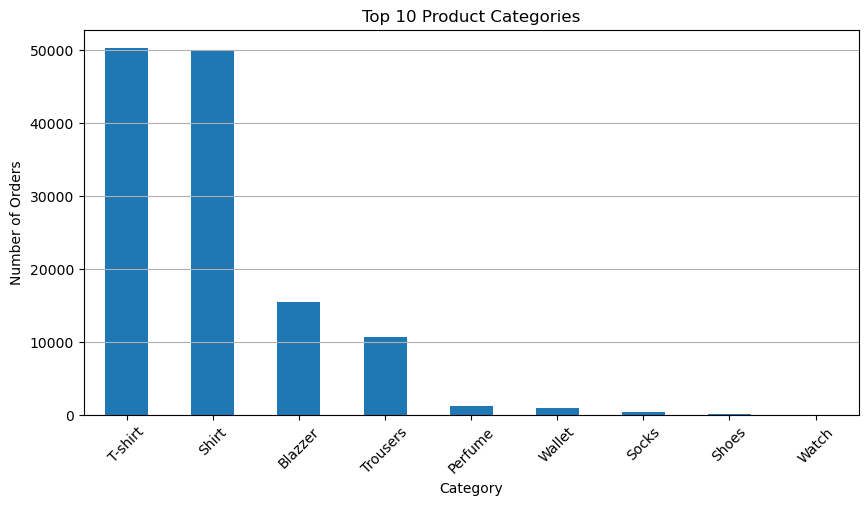

In [5]:
top_categories = df['Category'].value_counts().head(10)
top_categories.plot(kind='bar', title='Top 10 Product Categories', figsize=(10, 5))
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

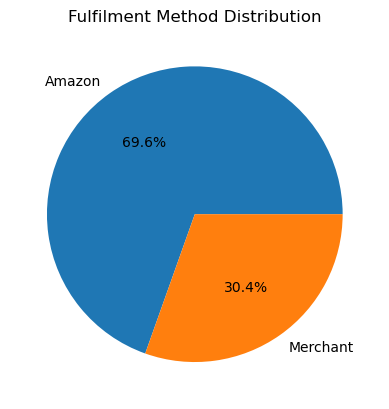

In [6]:
fulfillment = df['Fulfilment'].value_counts()
fulfillment.plot(kind='pie', autopct='%1.1f%%', title='Fulfilment Method Distribution')
plt.ylabel('')
plt.show()

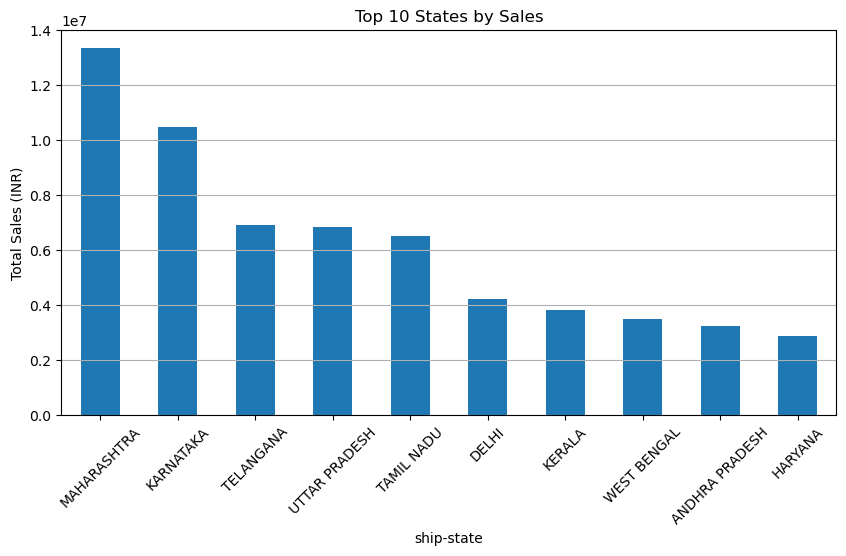

In [7]:
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)
state_sales.plot(kind='bar', title='Top 10 States by Sales', figsize=(10, 5))
plt.ylabel('Total Sales (INR)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()